In [4]:
install.packages("moments")
library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [76]:
n <- 1000
ri <- sample(10:15, n, replace = TRUE) # n случайных чисел из диапазона от 10 до 15
r01 <- runif(n, min = 0, max = 1) # n случайных чисел R(0,1)- равномерно распределённых на интервале (0,1)
a <- 4
b <- 7
rab <- runif(n, min = a, max = b) # генерация n случайных чисел R(a,b)- равномерно распределённых на интервале (a,b)
rn <- rnorm(n, mean = 10, sd = 2) # n нормально распределённых с МО=10 и СКО=2

In [43]:
A <- skewness(rn) #  асимметрия
E <- kurtosis(rn) #  эксцесс
A
E

[1] 0.07363245

[1] 2.944565

In [21]:
# проверка на нормальность
# H0: распределение является нормальным
# H1: распределение не является нормальным
alfa <- 0.05  #  уровень значимости

# проверка на нормальность выборки ri

In [50]:
cat("первые десять элементов выборки:", head(r01, 10), "\n")
stat <- chisq.test(r01)$statistic
p <- chisq.test(r01)$p.value #  тест Хи-квадрат
cat("ХИ-квадрат:\n", sprintf("stat=%.2f", stat), sprintf("p=%.5e", p), "\n")
stat <- shapiro.test(r01)$statistic
p <- shapiro.test(r01)$p.value #  тест Шапиро-Уилка
cat("шапиро:\n", sprintf("stat=%.2f", stat), sprintf("p=%.5e", p), "\n")

первые десять элементов выборки: 0.1323946 0.9769184 0.5741834 0.2959576 0.2923914 0.6378553 0.3283008 0.9804605 0.7071629 0.9843324 


Warning message in chisq.test(r01):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(r01):
“Chi-squared approximation may be incorrect”


ХИ-квадрат:
 stat=174.31 p=1.00000e+00 
шапиро:
 stat=0.95 p=3.26329e-18 


In [ ]:
# p-значение в шапиро тесте значительно меньше alfa в нем
# гипотеза H0 отвергается 
#  распределение не является нормальным

In [49]:
# проверка на нормальность выборки rn -  N(10,2)
cat("первые десять элементов выборки:", head(rn, 10), "\n")
stat <- chisq.test(rn)$statistic
p <- chisq.test(rn)$p.value
cat("ХИ-квадрат:\n", sprintf("stat=%.5f", stat), sprintf("p=%.2f", p), "\n")
stat <- shapiro.test(rn)$statistic
p <- shapiro.test(rn)$p.value
cat("шапиро:\n", sprintf("stat=%.2f", stat), sprintf("p=%.2f", p), "\n")



первые десять элементов выборки: 13.18901 10.35818 8.219777 12.98799 13.02884 9.895747 7.706414 10.77008 7.821254 7.4691 
ХИ-квадрат:
 stat=405.01329 p=1.00 
шапиро:
 stat=1.00 p=0.35 


In [27]:
# p-значение в обоих тестах значительно больше alfa
# гипотеза H0 принимается 
# распределение является нормальным

In [65]:
# коэффициент линейной корреляции Пирсона ( данные распределены нормально)
# rn - N(10,2)
X <- rn
Y <- sin(rn)
corT <- cor.test(X, Y, method = "pearson")
sprintf("statistic=%.10f", corT$estimate)
if (cor.test(X, Y, method = "pearson")$p.value < alfa) {
  cat("H0 отвергается, принимается H1 - коэффициент значим (связь есть)\n")
} else {
  cat("H0 принимается - коэффициент незначим (связи нет)\n")
}

[1] "statistic=-0.2912034857"

H0 отвергается, принимается H1 - коэффициент значим (связь есть)


In [70]:
# коэффициент корреляции Спирмена(данные ранговые или метрические, но не распределены нормально)
# r01 - R(0,1)
# rab - R(4,7)
tat <- cor.test(rab, r01, method = "spearman")$estimate
p <- cor.test(rab, r01, method = "spearman")$p.value
tat
p
cat("коэффициент корреляции Спирмена равен", sprintf("%.2f", tat), "\n")
if (p < alfa) {
  cat("H0 отвергается, принимается H1 - коэффициент значим (связь есть)\n")
} else {
  cat("H0 принимается - коэффициент незначим (связи нет)\n")
}

rho 
-0.03025839

[1] 0.3390742

коэффициент корреляции Спирмена равен -0.03 
H0 принимается - коэффициент незначим (связи нет)


In [71]:
# коэффициент корреляции Кендалла (данные ранговые или метрические, но не распределены нормально)
# r01 - R(0,1)
# rab - R(4,7)
stat.p <- cor.test(rab, r01, method="kendall", alternative="two.sided")
cat("Коэффициент корреляции Кендалла равен", round(stat.p$estimate,3), "\n")
if (stat.p$p.value < alfa) {
  cat("H0 отвергается, принимается H1 - коэффициент значим (связь есть)\n")
} else {
  cat("H0 принимается - коэффициент незначим (связи нет)\n")
}

Коэффициент корреляции Кендалла равен -0.02 
H0 принимается - коэффициент незначим (связи нет)


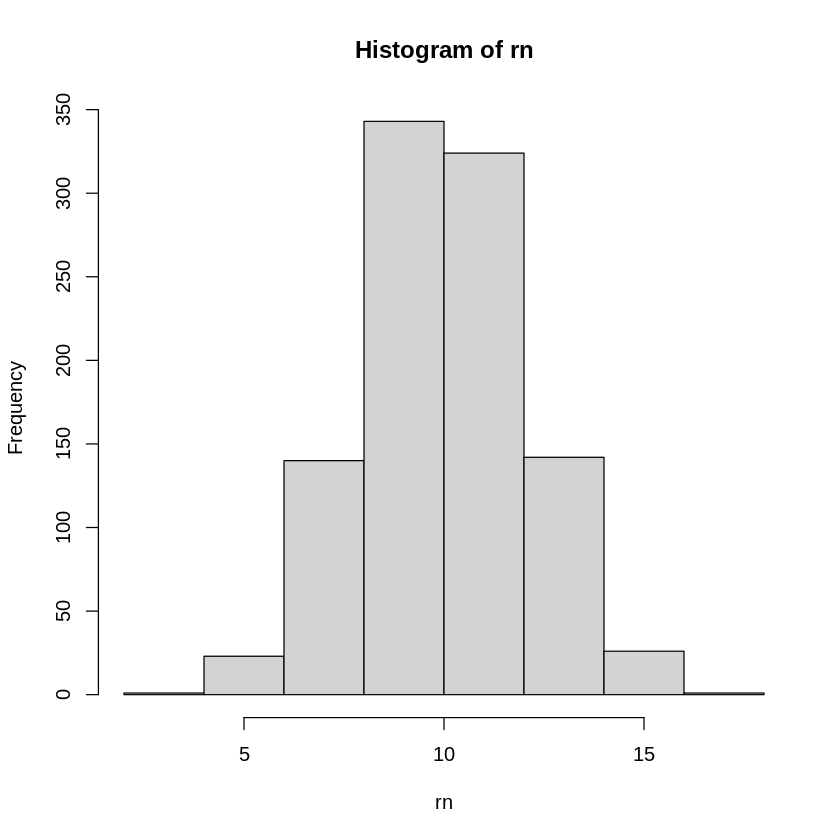

In [74]:
# построение гистограммы
#rn - N(10,2) - n значений
#rab - R(4,7) - n значений
#r01 - R(0,1) - n  значений
hist(rn, breaks = 7) # гистограмма с разбиением на 7 интервалов (по умолчанию 10 интервалов)

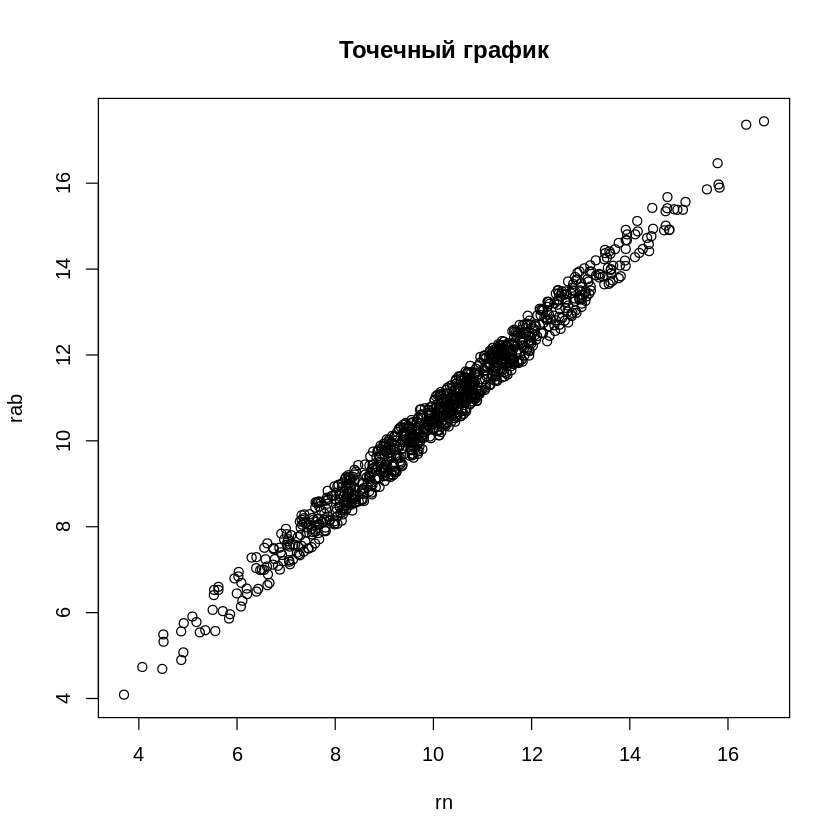

In [96]:
# диаграмма рассеяния
# import matplotlib.pyplot as plt
# Создаем случайные векторы данных
# rn <- rnorm(50, mean=10, sd=2)
# rab <- runif(50, min=4, max=7)
# r01 <- rbinom(50, 1, 0.5)

# Создаем график
plot(x = rn, y = rn + r01, xlab = "rn", ylab = "rab", main = "Точечный график")

# Добавляем линию регрессии
# abline(lm(rn ~ rab), col="red")